In [3]:
from moldy.case_studies.baloo_sim.nempc_baloo_sim import nempc_baloo_setup
from moldy.case_studies.baloo_sim.model_baloo_sim import BalooSim
from moldy.validation.control.control_test import ControlTest
import numpy as np

tester = ControlTest(ground_truth=BalooSim(), 
                    nempc_setup=nempc_baloo_setup,
                    sim_seconds=20.0,
                    num_step_commands=2,
                    states_of_interest=[18, 19, 20, 21, 22, 23],
                    )

In [2]:
horizon = 40
numSims = 1000
numParents = 400
numStrangers = 100
numKnotPoints = 1
selection_method = "tournament"
tournament_size = 5
crossover_method = "knot_point"
mutation_probability = 0.1
Q = np.diag([0,0,0,0,0,0,0,0,0,0,0,0,
            # 0.21, 0.21, 0.21, 0.21, 0.21, 0.21,  # velocity weights
            0.1, 0.1, 0.1, 0.1, 0.1, 0.1,  # velocity weights
            # 0, 0.0, 0.0, 0.0, 0.0, 0.0,  # velocity weights
            50, 50, 50, 50, 50, 50               # position weights
            ])  
R = 1e-4 * np.diag([1.0, 1.0, 1.0, 1.0,
                    1.0, 1.0, 1.0, 1.0,
                    1.0, 1.0, 1.0, 1.0,])
ctrl_dt = 0.02

nempc_params = {"horizon": horizon,
                "numSims": numSims,
                "numParents": numParents,
                "numStrangers": numStrangers,
                "numKnotPoints": numKnotPoints,
                "selection_method": selection_method,
                "tournament_size": tournament_size,
                "crossover_method": crossover_method,
                "mutation_probability": mutation_probability,
                "Q": Q,
                "R": R,
                }
def setup_wrapper(trial_dir=None, x0=None):
    return nempc_baloo_setup(trial_dir=trial_dir, x0=x0, horizon=horizon, numSims=numSims, numParents=numParents, numStrangers=numStrangers, numKnotPoints=numKnotPoints, Q=Q, R=R, ctrl_dt=ctrl_dt)

tester.run_trials("/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/test_results/",
                "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/best_models/",
                run_analytical=False,
                nempc_setup=setup_wrapper,
                nempc_params=nempc_params,
                ctrl_dt=ctrl_dt,
                test_name="lower_horizon_knot_points",
                )

In [1]:
from moldy.validation.prediction.prediction_validation import PredictionValidation

from moldy.case_studies.baloo_sim.model_baloo_sim import BalooSim
from moldy.case_studies.baloo_sim.learned_model_baloo_sim import LearnedModel_BalooSim

data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/validation_inputdata.npy"
# data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/good_data/noisy_press_smooth_joints/"
# data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/good_data/original_data/validation_inputdata.npy"
# data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/good_data/test_data/validation_inputdata.npy"



pred_tester = PredictionValidation(LearnedModel_BalooSim, 3500, BalooSim(XML_PATH="/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/sys_id_baloo.xml"), data_path=data_path, states_of_interest=list(range(18, 24)), data_start_location=5000)
pred_tester.run_trials(
                    "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/run_logs/",
                  "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/test_results/",
                  "noisy_tests")

# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# [12, 13, 14, 15, 16, 17]
# [18, 19, 20, 21, 22, 23]

In [7]:
##################### ORIGINAL MODEL ############################
from moldy.validation.prediction.prediction_validation import PredictionValidation

from moldy.case_studies.baloo_sim.model_baloo_sim import BalooSim
from moldy.case_studies.baloo_sim.learned_model_baloo_sim import LearnedModel_BalooSim

data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/good_data/original_data/validation_inputdata.npy"


pred_tester = PredictionValidation(LearnedModel_BalooSim, 3000, BalooSim(XML_PATH="/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/baloo.xml"), states_of_interest=list(range(18, 24)), data_start_location=25000, data_path=data_path)
pred_tester.run_trials(
                    "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/run_logs/",
                  "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/test_results/",
                  "source_model_prediction")

# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# [12, 13, 14, 15, 16, 17]
# [18, 19, 20, 21, 22, 23]

In [11]:
########################################### FULL TEST SET ###########################################
from moldy.validation.prediction.prediction_validation import PredictionValidation

from moldy.case_studies.baloo_sim.model_baloo_sim import BalooSim
from moldy.case_studies.baloo_sim.learned_model_baloo_sim import LearnedModel_BalooSim

data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/good_data/test_data/validation_inputdata.npy"


pred_tester = PredictionValidation(LearnedModel_BalooSim, 63000, BalooSim(XML_PATH="/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/baloo.xml"), states_of_interest=list(range(18, 24)), data_start_location=5000, data_path=data_path)
pred_tester.run_trials(
                    "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/best_models/",
                  "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/test_results/",
                  "ALL_BEST_MODELS_PREDICTION_FULL_TEST")

# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# [12, 13, 14, 15, 16, 17]
# [18, 19, 20, 21, 22, 23]

In [3]:
########################################### SMALL TEST SET ###########################################
from moldy.validation.prediction.prediction_validation import PredictionValidation

from moldy.case_studies.baloo_sim.model_baloo_sim import BalooSim
from moldy.case_studies.baloo_sim.learned_model_baloo_sim import LearnedModel_BalooSim

data_path = "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/data/good_data/test_data/validation_inputdata.npy"


pred_tester = PredictionValidation(LearnedModel_BalooSim, 5000, BalooSim(XML_PATH="/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/model/baloo.xml"), states_of_interest=list(range(18, 24)), data_start_location=5000, data_path=data_path)
pred_tester.run_trials(
                    "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/best_models/",
                    # "/home/daniel/Documents/data/xfer_learning/sim_to_sim_baloo/ALL_MODELS/",
                  "/home/daniel/catkin_ws/src/moldy/case_studies/baloo_sim/results/test_results/",
                  "ALL_FINETUNE_MODELS_PREDICTION_SHORT_TEST_SET")

# [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
# [12, 13, 14, 15, 16, 17]
# [18, 19, 20, 21, 22, 23]

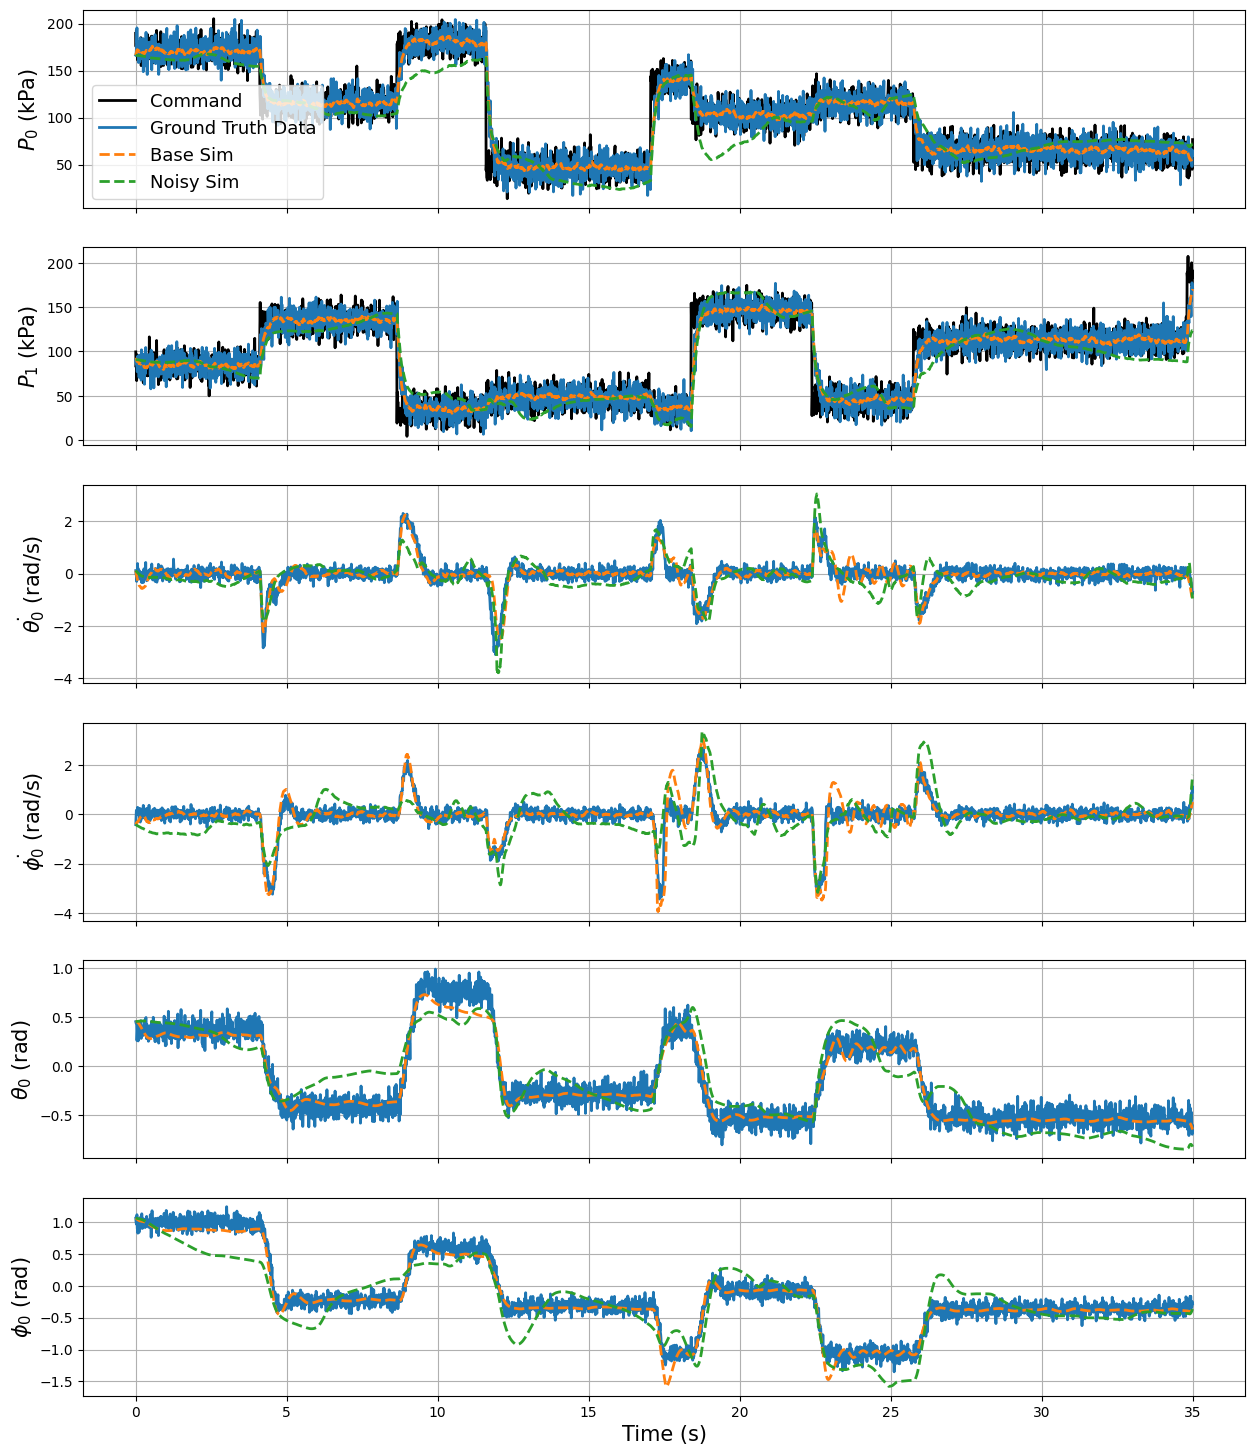

In [2]:
import matplotlib.pyplot as plt
import numpy as np
# state_labels = ["$\\theta_0$", "$\\phi_0$", "\\$theta_1$", "\\$phi_1$", "$\\theta_2$", "$\\phi_2$"]
# plot_prediction_performance(tester.results, [18, 19, 20, 21, 22, 23], 
#                             state_labels,
#                             "/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/baloo_left_arm_joint_prediction.png")
state_labels = ["$P_0$ (kPa)", "$P_1$ (kPa)", "$\\dot{\\theta_0}$ (rad/s)", "$\\dot{\\phi_0}$ (rad/s)", "$\\theta_0$ (rad)", "$\\phi_0$ (rad)"]
states_of_interest = [0, 1, 12, 13, 18, 19]
ground_truth_data = pred_tester.results["ground_truth"]
pred_tester.results.pop("ground_truth")

plt.rc('pdf',fonttype = 42)
plt.rc('axes', labelsize=15)

fig, axs = plt.subplots(len(states_of_interest), 1, figsize=(15, len(states_of_interest)*3), sharex=True)

timestep = np.linspace(0, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"].shape[0]//100, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"].shape[0])

for i in range(len(states_of_interest)):
    if states_of_interest[i] < 12:
        axs[i].plot(timestep, ground_truth_data[:, i+24], "-k", label="Command", linewidth=2.0)
    axs[i].plot(timestep, ground_truth_data[:, states_of_interest[i]], label="Ground Truth Data", linewidth=2.0)

    for key in sorted(pred_tester.results.keys()):
        # if key.split("/")[-1][:4] == "250K":
        #     continue
        axs[i].plot(timestep, pred_tester.results[key]["learned_predictions"][:, states_of_interest[i]], "--", label=key.split("/")[-1], linewidth=2.0) #, c="tab:orange")
# 
    # axs[i].plot(timestep, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"][:, states_of_interest[i]], "--", c="tab:orange", label="Model Prediction", linewidth=2.0)
    axs[i].grid()
    axs[i].set_ylabel(state_labels[i])

axs[-1].set_xlabel("Time (s)")
axs[0].legend(loc="lower left", fontsize=13)
# fig.legend(*axs[0].get_legend_handles_labels(),
#             loc='upper center', ncol=6, fontsize=15)

pred_tester.results["ground_truth"] = ground_truth_data

plt.savefig("/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/baloo_noisy_sim_predicting_noisy.pdf", bbox_inches="tight")

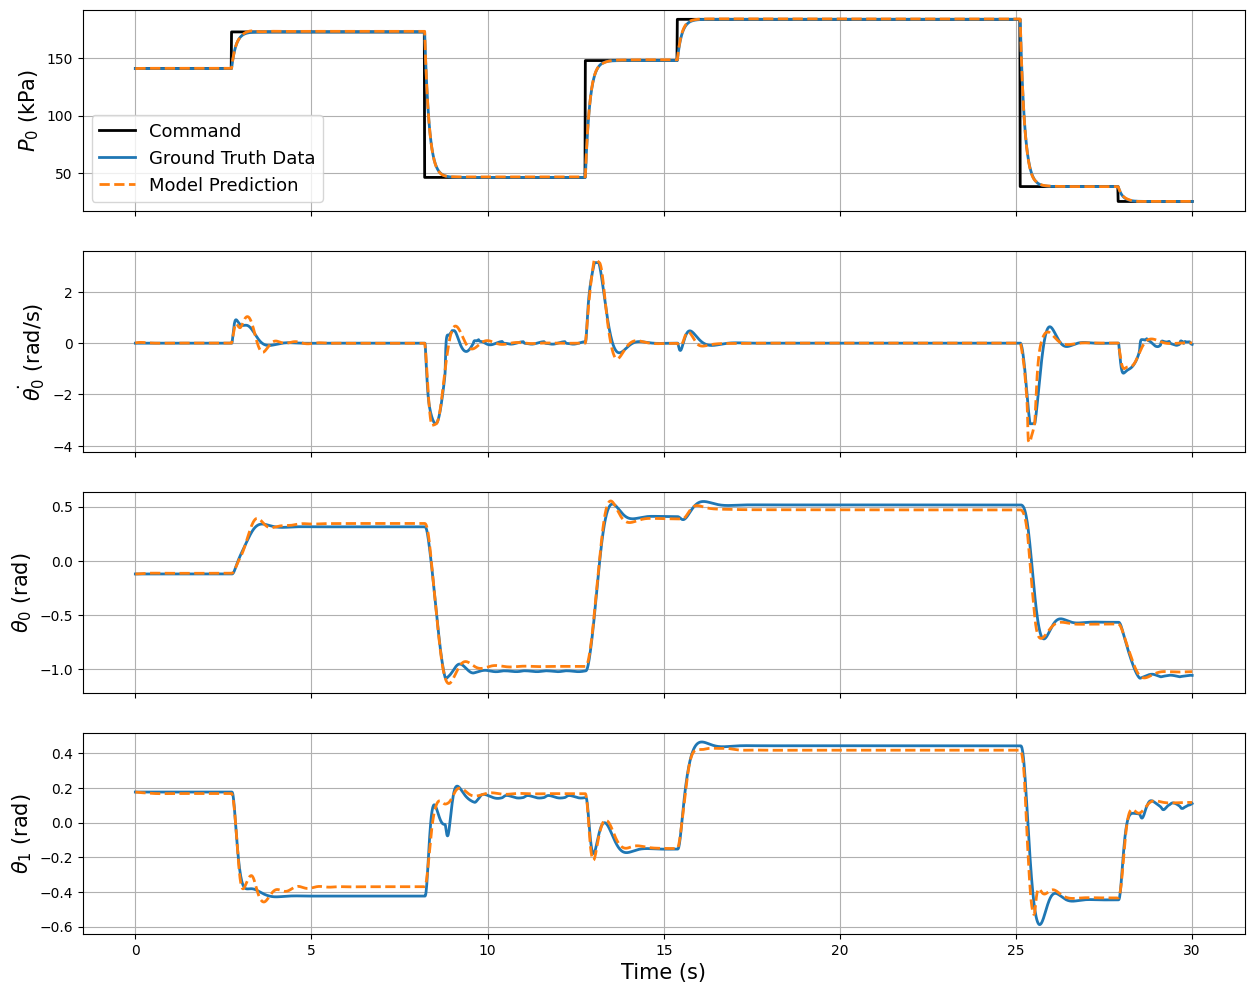

In [9]:
import matplotlib.pyplot as plt
import numpy as np
# state_labels = ["$\\theta_0$", "$\\phi_0$", "\\$theta_1$", "\\$phi_1$", "$\\theta_2$", "$\\phi_2$"]
# plot_prediction_performance(tester.results, [18, 19, 20, 21, 22, 23], 
#                             state_labels,
#                             "/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/baloo_left_arm_joint_prediction.png")
state_labels = ["$P_0$ (kPa)", "$\\dot{\\theta_0}$ (rad/s)", "$\\theta_0$ (rad)", "$\\theta_1$ (rad)"]
states_of_interest = [0, 12, 18, 20]
ground_truth_data = pred_tester.results["ground_truth"]
pred_tester.results.pop("ground_truth")

plt.rc('pdf',fonttype = 42)
plt.rc('axes', labelsize=15)

fig, axs = plt.subplots(len(states_of_interest), 1, figsize=(15, len(states_of_interest)*3), sharex=True)

timestep = np.linspace(0, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"].shape[0]//100, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"].shape[0])

for i in range(len(states_of_interest)):
    if states_of_interest[i] < 12:
        axs[i].plot(timestep, ground_truth_data[:, i+24], "-k", label="Command", linewidth=2.0)
    axs[i].plot(timestep, ground_truth_data[:, states_of_interest[i]], c="C0", label="Ground Truth Data", linewidth=2.0)

    # for key in sorted(pred_tester.results.keys()):
    #     if key.split("/")[-1][:4] == "250K":
    #         continue
    #     axs[i].plot(timestep, pred_tester.results[key]["learned_predictions"][:, states_of_interest[i]], "--", label=key.split("/")[-1], linewidth=2.0) #, c="tab:orange")
# 
    axs[i].plot(timestep, pred_tester.results[list(pred_tester.results.keys())[0]]["learned_predictions"][:, states_of_interest[i]], "--", c="tab:orange", label="Model Prediction", linewidth=2.0)
    axs[i].grid()
    axs[i].set_ylabel(state_labels[i])

axs[-1].set_xlabel("Time (s)")
axs[0].legend(loc="lower left", fontsize=13)
# fig.legend(*axs[0].get_legend_handles_labels(),
#             loc='upper center', ncol=6, fontsize=15)

pred_tester.results["ground_truth"] = ground_truth_data

plt.savefig("/home/daniel/catkin_ws/src/moldy/figure_generation/generated_figures/baloo_base_prediction.pdf", bbox_inches="tight")
